# Comparing number of generated and reconstructed charged tracks

In this example, we compare the reconstructed charged track multiplicity to the truth-level generated multiplicity. This gives an indication of the efficiency with which tracks in the event are reconstructed.

In [9]:
import uproot4 as uproot
from fcc_python_tools.locations import loc
import matplotlib.pyplot as plt
import awkward1 as ak
from particle import literals as lp
from fcc_python_tools import plotting, kinematics
import numpy as np

#from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Roman']})
#rc('text', usetex=True)

n_events = 10000
file = uproot.open("/eos/experiment/fcc/ee/tmp/fcc_python_tools/FCCDelphesOutput_10k.root")
tree = file['events']

Get generated particles, and filter on the kaon, pion, muon, electron, and proton PDG IDs

/afs/cern.ch/work/d/dhill/miniconda/envs/fcc_pyenv/lib/python3.7/site-packages/awkward1/_connect/_numpy.py:101: RuntimeWarning: divide by zero encountered in true_divide
  *[nplike.asarray(x) for x in inputs], **kwargs


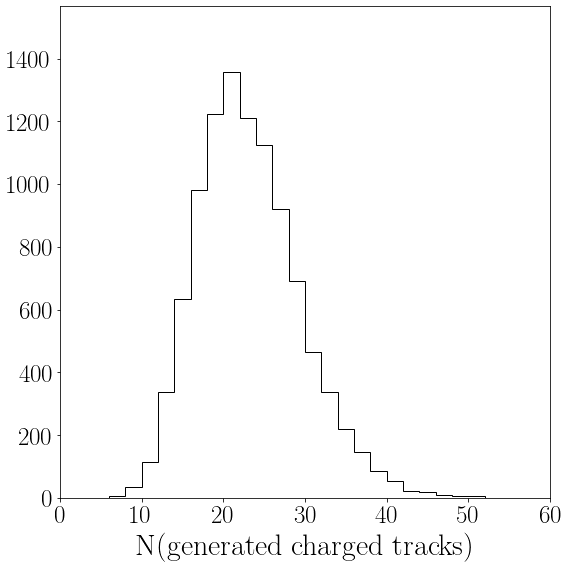

In [10]:
g_container = "genParticles.core"
g = tree.arrays(filter_name=f"{g_container}*", how="zip")
g[g_container,'p4.eta'] = kinematics.calc_eta(g,g_container)

#Apply eta cut to match the barrel detector cuts applied on reco particles
g_eta_cut = abs(g[g_container,'p4.eta']) < 3
g = g[g_eta_cut]

p_list = {"mu": abs(lp.mu_plus.pdgid), 
          "e": abs(lp.e_plus.pdgid), 
          "pi": abs(lp.pi_plus.pdgid), 
          "K": abs(lp.K_plus.pdgid), 
          "p": abs(lp.p.pdgid)
         }

n_gen = {}
for p in p_list:
    p_cut = abs(g[g_container,'pdgId']) == p_list[p]
    g_p = g[p_cut]
    n_gen[p] = ak.num(g_p[g_container])

n_gen_tot = n_gen["mu"] + n_gen["e"] + n_gen["pi"] + n_gen["K"] + n_gen["p"]

plotting.hist_plot(n_gen_tot,"n_gen","N(generated charged tracks)",0.,60.,30)

Same thing but for reconstructed muons, electrons, and hadrons

In [11]:
mu_container = "muons.core"
mu = tree.arrays(filter_name=f"{mu_container}*", how="zip")

mu_cut = abs(mu[mu_container,'pdgId']) == p_list["mu"]
mu = mu[mu_cut]
n_mu = ak.num(mu[mu_container])

In [12]:
e_container = "electrons.core"
e = tree.arrays(filter_name=f"{e_container}*", how="zip")

e_cut = abs(e[e_container,'pdgId']) == p_list["e"]
e = e[e_cut]
n_e = ak.num(e[e_container])

In [13]:
h_container = "efcharged.core"
h = tree.arrays(filter_name=f"{h_container}*", how="zip")

n_h = {}
for p in ["K","pi","p"]:
    h_cut = abs(h[h_container,'pdgId']) == p_list[p]
    h_p = h[h_cut]
    n_h[p] = ak.num(h_p[h_container])

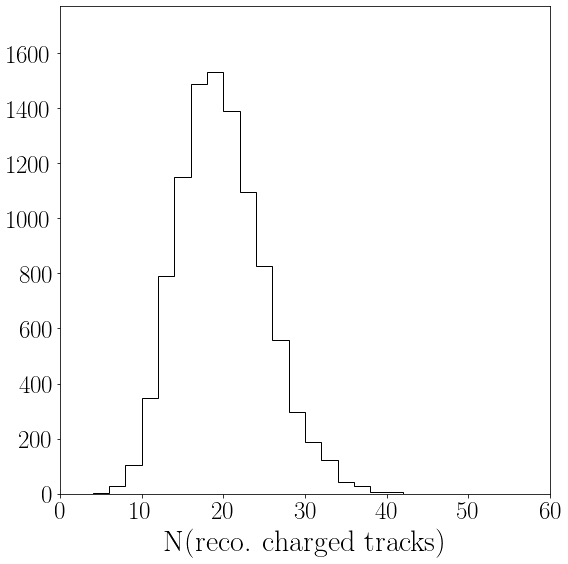

In [14]:
n_reco_tot = n_mu+n_e+n_h["pi"]+n_h["K"]+n_h["p"]
plotting.hist_plot(n_reco_tot,"n_reco","N(reco. charged tracks)",0.,60.,30)

Calculate the fraction of reco charged tracks compared to generated:

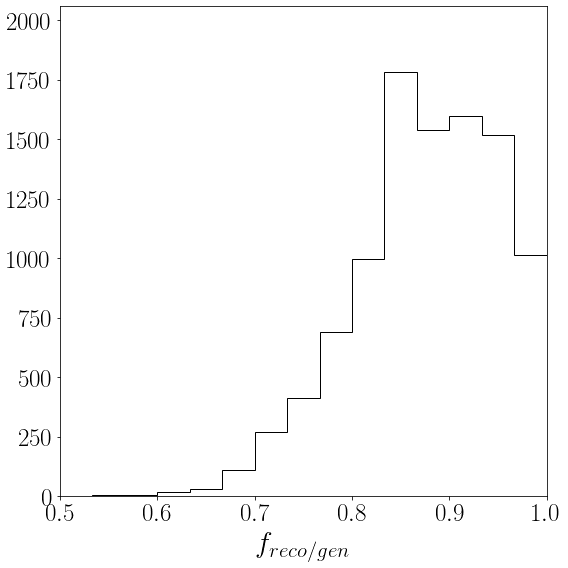

In [15]:
f = n_reco_tot / n_gen_tot
plotting.hist_plot(f,"f_reco_gen","$f_{reco/gen}$",0.5,1.,15)

Check the reco fraction as a function of the true number of tracks in the event:

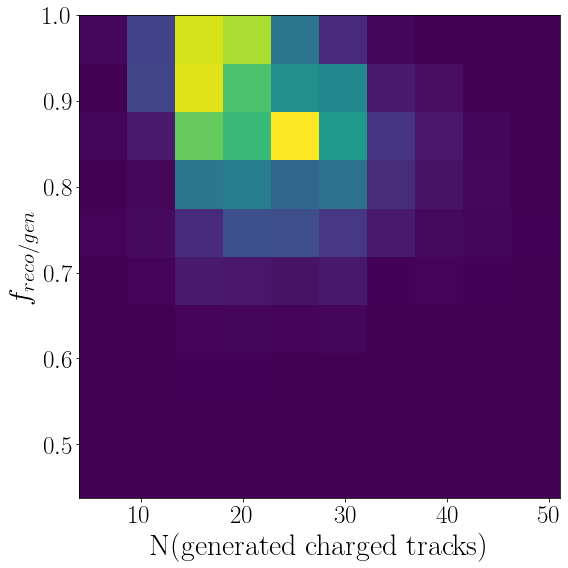

In [16]:
plotting.hist_plot_2d(n_gen_tot,
                      "n_gen",
                      "N(generated charged tracks)",
                      f,
                      "f_reco_gen",
                      "$f_{reco/gen}$",
                      np.min(n_gen_tot.tolist()),
                      np.max(n_gen_tot.tolist()),
                      np.min(f.tolist()),
                      np.max(f.tolist()),
                      10,
                      10,
                      False)